In [1]:
import matplotlib.pyplot as plt
import numpy as np
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, BasicAer, execute
from qiskit.tools.visualization import plot_histogram

from arithmetic import *

In [19]:
n = 4
iters = 1

#

coin_qr = QuantumRegister(1)
pos_qr = QuantumRegister(n)
pos_cr = ClassicalRegister(n)
carry_qr = QuantumRegister(n - 1)
cond_qr = QuantumRegister(1)
ancilla_qr = QuantumRegister(1) # As many as control qubits

circuit = QuantumCircuit(coin_qr, pos_qr, carry_qr, cond_qr, ancilla_qr, pos_cr)
for i in range(iters):
    circuit.h(coin_qr)
    mc_add_classical(circuit, [ coin_qr[0] ], 1, pos_qr, carry_qr, cond_qr, ancilla_qr)
    circuit.x(coin_qr[0])
    mc_subtract_classical(circuit, [ coin_qr[0] ], 1, pos_qr, carry_qr, cond_qr, ancilla_qr)
    circuit.x(coin_qr[0])
circuit.measure(pos_qr, pos_cr)

In [20]:
circuit.depth()

56

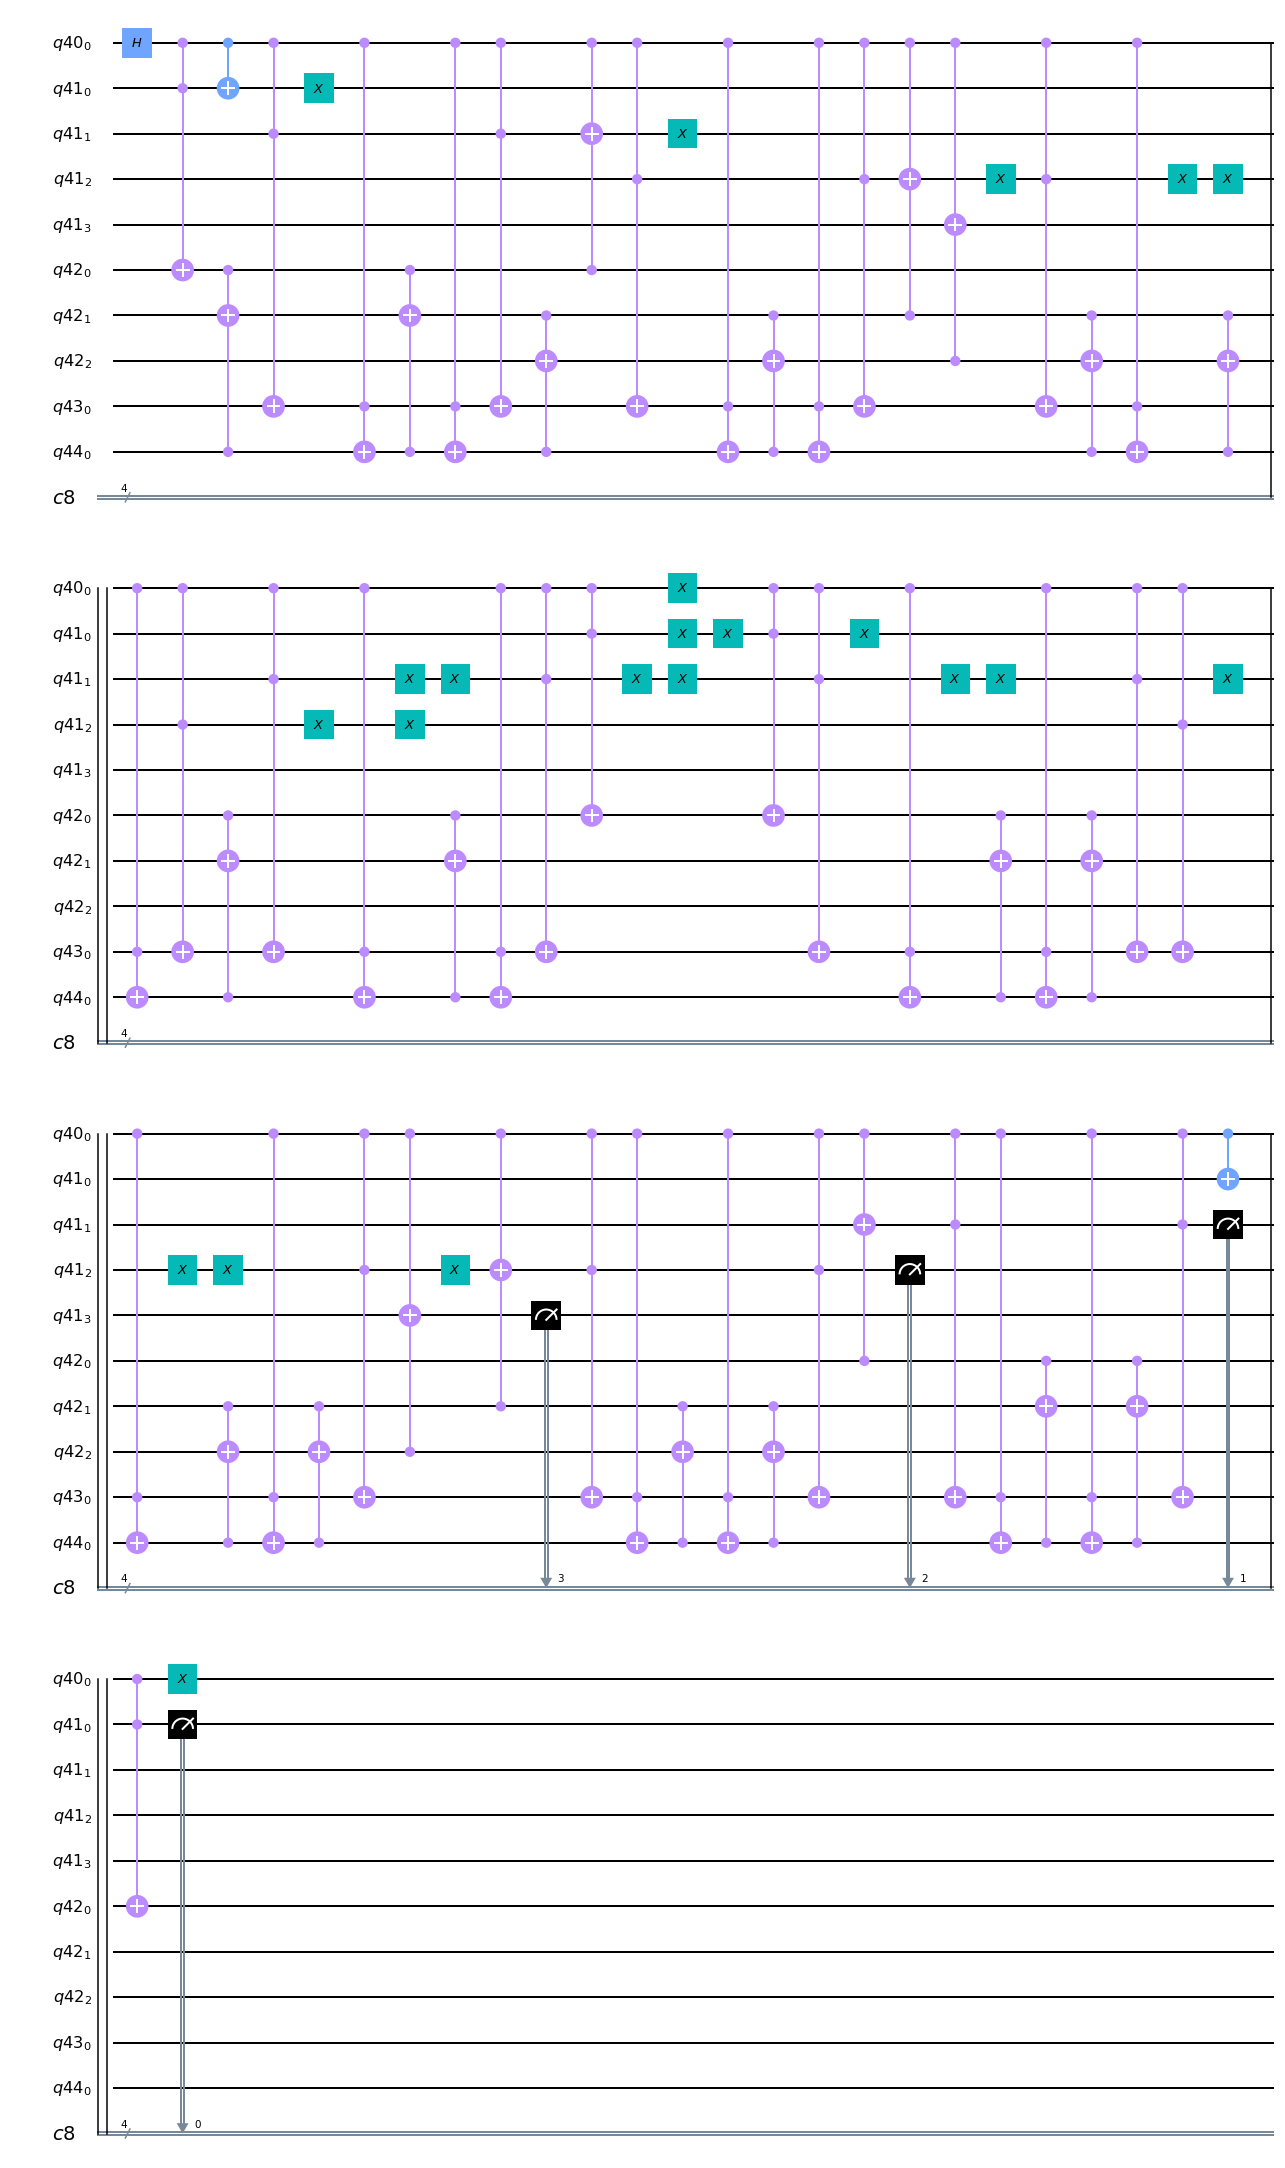

In [21]:
circuit.draw(output="mpl")

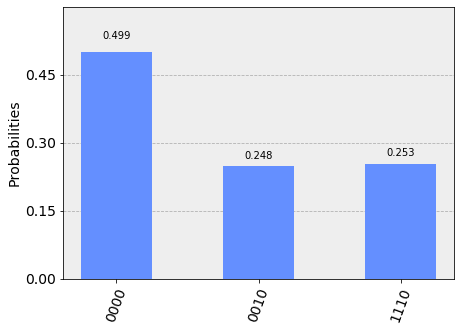

In [17]:
job = execute(circuit, backend=BasicAer.get_backend("qasm_simulator"), shots=10000)
result = job.result()
plot_histogram(result.get_counts(circuit))